<a href="https://colab.research.google.com/github/SamuelLawrence876/Jamaica-stock-exchange-quantative-analysis/blob/master/Quant_analysis_with_JSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook serves as an introuction into using quantative finacne python modules on jamaican stocks 

In [175]:
#ffn library isn't update with current git files

In [176]:
#pip install git+https://github.com/pmorissette/ffn.git

In [177]:
import pandas as pd
import ffn
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Pulling data from the JSE

In [178]:
NCBFG = 'https://www.jamstockex.com/market-data/download-data/price-history/NCBFG/2019-09-09/2020-09-07'
df0 = pd.read_html(NCBFG)
df0 = df0[0]
str_val0 = 'NCBFG'
df0 = df0.rename(columns={'Close  Price ($)': str_val0})

In [179]:
CCC = 'https://www.jamstockex.com/market-data/download-data/price-history/CCC/2019-09-09/2020-09-07'
df1 = pd.read_html(CCC)
df1 = df1[0]
str_val1 = 'CCC'
df1 = df1.rename(columns={'Close  Price ($)': str_val1})

In [180]:
WIG = 'https://www.jamstockex.com/market-data/download-data/price-history/WIG/2019-09-09/2020-09-07'
df2 = pd.read_html(WIG)
df2 = df2[0]
str_val2 = 'WIG'
df2 = df2.rename(columns={'Close  Price ($)': str_val2})

In [181]:
AMG = 'https://www.jamstockex.com/market-data/download-data/price-history/AMG/2019-09-09/2020-09-07'
df3 = pd.read_html(AMG)
df3 = df3[0]
str_val3 = 'AMG'
df3 = df3.rename(columns={'Close  Price ($)': str_val3})

In [182]:
JP = 'https://www.jamstockex.com/market-data/download-data/price-history/JP/2019-09-09/2020-09-07'
df4 = pd.read_html(JP)
df4 = df4[0]
str_val4 = 'JP'
df4 = df4.rename(columns={'Close  Price ($)': str_val4})

In [183]:
SCIJMD = 'https://www.jamstockex.com/market-data/download-data/price-history/SCIJMD/2019-09-09/2020-09-07'
df5 = pd.read_html(SCIJMD)
df5 = df5[0]
str_val5 = 'SCIJMD'
df5 = df5.rename(columns={'Close  Price ($)': str_val5})

In [184]:
BIL = 'https://www.jamstockex.com/market-data/download-data/price-history/BIL/2019-09-09/2020-09-07'
df6 = pd.read_html(BIL)
df6 = df6[0]
str_val6 = 'BIL'
df6 = df6.rename(columns={'Close  Price ($)': str_val6})

In [185]:
GK = 'https://www.jamstockex.com/market-data/download-data/price-history/GK/2019-09-09/2020-09-07'
df7 = pd.read_html(GK)
df7 = df7[0]
str_val7 = 'GK'
df7 = df7.rename(columns={'Close  Price ($)': str_val7})

In [187]:
MIL = 'https://www.jamstockex.com/market-data/download-data/price-history/MIL/2019-09-09/2020-09-07'
df8 = pd.read_html(MIL)
df8 = df8[0]
str_val8 = 'MIL'
df8 = df8.rename(columns={'Close  Price ($)': str_val8})

## Creating Data frames from data / making data readable by ffn API

In [199]:
df = pd.concat([df0, df1, df2, df3, df4, df5, df6, df7, df8], axis=1)

In [ ]:
df.sample(5)

In [201]:
df = df[['Date', str_val0, str_val1, str_val2, str_val3, str_val4,
         str_val5, str_val6, str_val7, str_val8]]

In [206]:
df = df.loc[:,~df.columns.duplicated()]

In [207]:
df.head()

,Date,NCBFG,CCC,WIG,AMG,JP,SCIJMD,BIL,GK,MIL
0,2019-09-09,212.44,84.25,0.91,2.25,23.86,21.55,74.01,69.44,9.29
1,2019-09-10,213.72,82.10,0.90,2.04,23.96,21.81,72.94,67.03,9.29
2,2019-09-11,213.34,78.32,0.91,2.02,24.08,21.98,73.90,68.81,9.25
3,2019-09-12,209.88,78.40,0.88,2.02,24.03,23.29,73.90,69.56,9.30
4,2019-09-13,210.73,79.06,0.89,2.01,23.85,23.06,71.21,69.73,8.83


In [209]:
df['Date'] = pd.to_datetime(df.Date)

In [210]:
df['Date'] = df1['Date'].dt.strftime('%m/%d/%Y')

In [211]:
df.to_csv('df.csv', index=False)

# Placing data into FFN module

In [225]:
data = ffn.data.get(str_val0, provider=ffn.data.csv, path='df.csv')
data = ffn.data.get(str_val1, provider=ffn.data.csv, path='df.csv', existing=data)
data = ffn.data.get(str_val2, provider=ffn.data.csv, path='df.csv', existing=data)
data = ffn.data.get(str_val3, provider=ffn.data.csv, path='df.csv', existing=data)
data = ffn.data.get(str_val4, provider=ffn.data.csv, path='df.csv', existing=data)
data = ffn.data.get(str_val5, provider=ffn.data.csv, path='df.csv', existing=data)
data = ffn.data.get(str_val6, provider=ffn.data.csv, path='df.csv', existing=data)
data = ffn.data.get(str_val7, provider=ffn.data.csv, path='df.csv', existing=data)

In [56]:
# ad = set_riskfree_rate()

# Analysis 

In [226]:
returns = data.to_log_returns().dropna()
returns.head()

,ncbfg,ccc,wig,amg,jp,scijmd,bil,gk
Date,,,,,,,,
2019-09-10,0.006007,-0.025851,-0.011050,-0.097980,0.004182,0.011993,-0.014563,-0.035323
2019-09-11,-0.001780,-0.047135,0.011050,-0.009852,0.004996,0.007764,0.013076,0.026209
2019-09-12,-0.016351,0.001021,-0.033523,0.000000,-0.002079,0.057891,0.000000,0.010841
2019-09-13,0.004042,0.008383,0.011300,-0.004963,-0.007519,-0.009925,-0.037080,0.002441
2019-09-16,0.008129,0.004165,-0.069796,-0.004988,0.009597,0.002166,0.024826,-0.004024


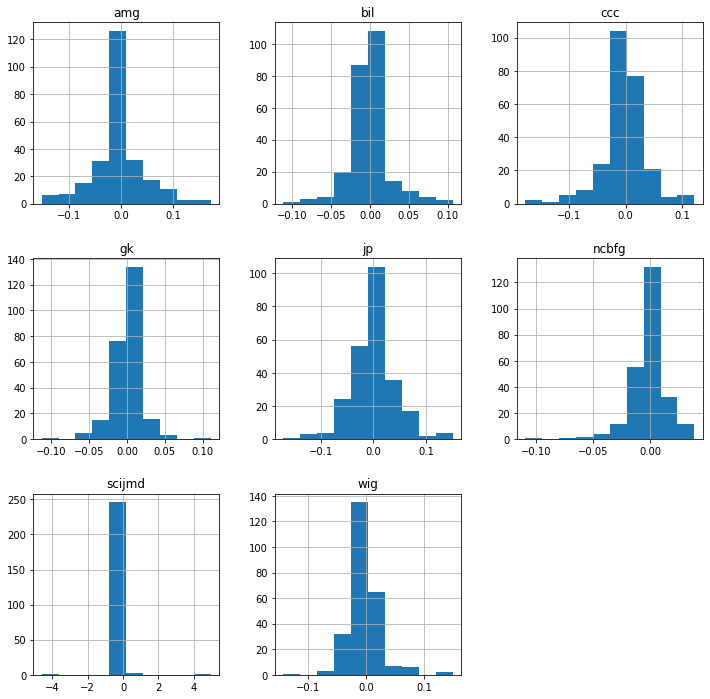

In [227]:
ax = returns.hist(figsize=(12, 12))

In [228]:
ffn.calc_total_return(data)

ncbfg    -0.357607
ccc      -0.450801
wig      -0.142857
amg      -0.222222
jp       -0.149623
scijmd   -0.262181
bil      -0.232266
gk       -0.191244
dtype: float64

In [229]:
returns.corr().as_format('.2f')

,ncbfg,ccc,wig,amg,jp,scijmd,bil,gk
ncbfg,1.00,0.08,0.10,0.01,0.06,0.02,0.04,0.08
ccc,0.08,1.00,0.07,0.11,0.05,-0.01,0.14,0.24
wig,0.10,0.07,1.00,-0.02,0.10,-0.02,0.12,0.12
amg,0.01,0.11,-0.02,1.00,0.08,0.01,0.00,0.01
jp,0.06,0.05,0.10,0.08,1.00,0.04,0.16,0.11
scijmd,0.02,-0.01,-0.02,0.01,0.04,1.00,-0.02,-0.02
bil,0.04,0.14,0.12,0.00,0.16,-0.02,1.00,0.13
gk,0.08,0.24,0.12,0.01,0.11,-0.02,0.13,1.00


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

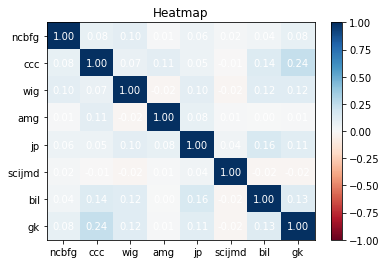

In [244]:
returns.plot_corr_heatmap()

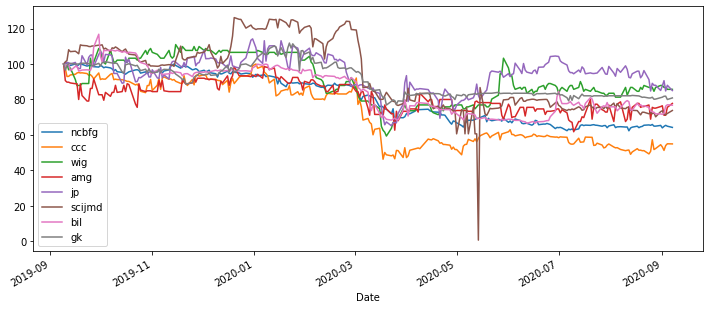

In [231]:
ax = data.rebase().plot(figsize=(12,5))

In [232]:
perf = data.calc_stats()

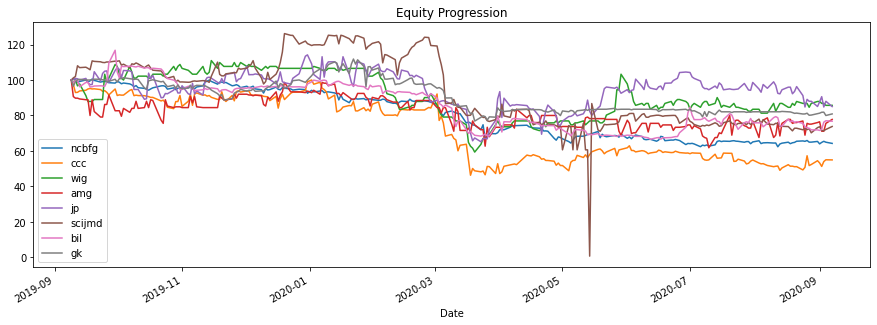

In [233]:
perf.plot()

In [234]:
perf.display()

Stat                 ncbfg       ccc         wig         amg         jp          scijmd      bil         gk
-------------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
Start                2019-09-09  2019-09-09  2019-09-09  2019-09-09  2019-09-09  2019-09-09  2019-09-09  2019-09-09
End                  2020-09-07  2020-09-07  2020-09-07  2020-09-07  2020-09-07  2020-09-07  2020-09-07  2020-09-07
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         -35.76%     -45.08%     -14.29%     -22.22%     -14.96%     -26.22%     -23.23%     -19.12%
Daily Sharpe         -1.67       -0.69       -0.11       0.07        0.09        0.99        -0.49       -0.55
Daily Sortino        -2.26       -1.02       -0.20       0.11        0.15        129.97      -0.83       -0.84
CAGR                 -35.86%     -45.19%     -14.33%     -22.29%     -15.01%     -26.30%     -23.

In [237]:
perf['MIL'].display_monthly_returns()

AttributeError: ignored

In [236]:
perf['MIL'].stats

AttributeError: ignored

In [238]:
returns.calc_mean_var_weights().as_format('.2%')

ncbfg      0.00%
ccc        0.00%
wig        0.02%
amg        0.00%
jp         0.00%
scijmd    99.98%
bil        0.00%
gk         0.00%
dtype: object

In [239]:
ffn.calc_risk_return_ratio(data)

ncbfg     5.900610
ccc       4.143229
wig       7.220543
amg       9.960049
jp        9.814128
scijmd    4.793763
bil       6.617193
gk        9.975743
dtype: float64

In [240]:
ffn.calc_sortino_ratio(returns, rf=0, nperiods=None, annualize=True)

ncbfg    -0.148050
ccc      -0.087593
wig      -0.036641
amg      -0.032424
jp       -0.025052
scijmd   -0.004140
bil      -0.071014
gk       -0.065819
dtype: float64

In [241]:
ffn.calc_sharpe(data, rf=0.0, nperiods=None, annualize=True)

ncbfg     5.900610
ccc       4.143229
wig       7.220543
amg       9.960049
jp        9.814128
scijmd    4.793763
bil       6.617193
gk        9.975743
dtype: float64

In [242]:
returns.calc_ftca(threshold=0.8)

{1: ['ccc'],
 2: ['scijmd'],
 3: ['jp'],
 4: ['amg'],
 5: ['wig'],
 6: ['ncbfg'],
 7: ['gk'],
 8: ['bil']}